## Lab 11: Visualizing Time Series Data


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
df = pd.read_csv('airline-passengers.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


## 1. Line Plot

**Description:**  
A simple line plot showing the number of airline passengers over time.

**Features used:**  
- `Month` (x-axis, time)
- `Passengers` (y-axis, value)

**Observation:**  
- There is a clear upward trend and visible seasonality in the number of passengers.

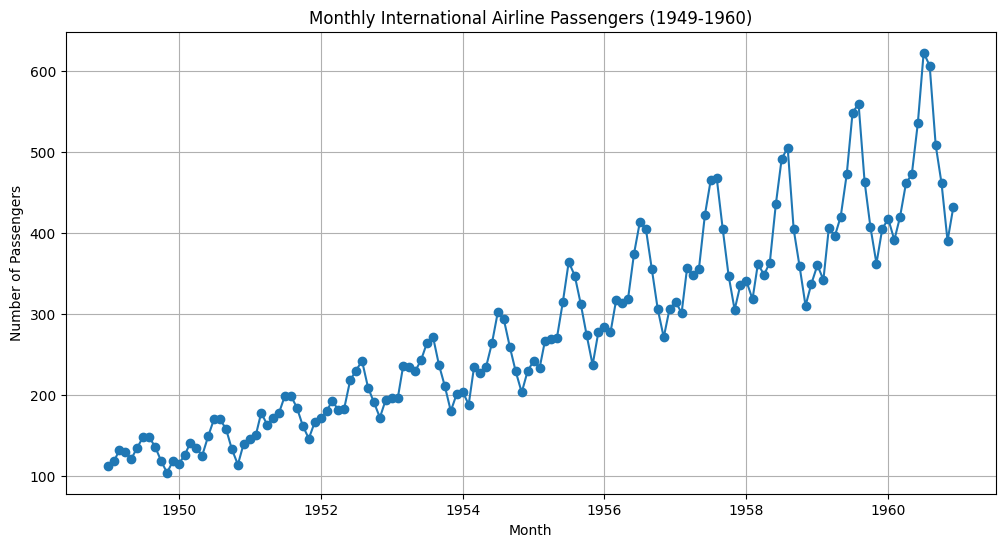

In [2]:


plt.figure(figsize=(12,6))
plt.plot(df['Month'], df['Passengers'], marker='o')
plt.title('Monthly International Airline Passengers (1949-1960)')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

## 2. Rolling Average Plot

**Description:**  
A rolling (moving) average smooths out short-term fluctuations and highlights longer-term trends.

**Features used:**  
- `Month` (x-axis)
- `Passengers` (y-axis)
- 12-month rolling mean

**Observation:**  
- The rolling average line makes the long-term growth trend even clearer.

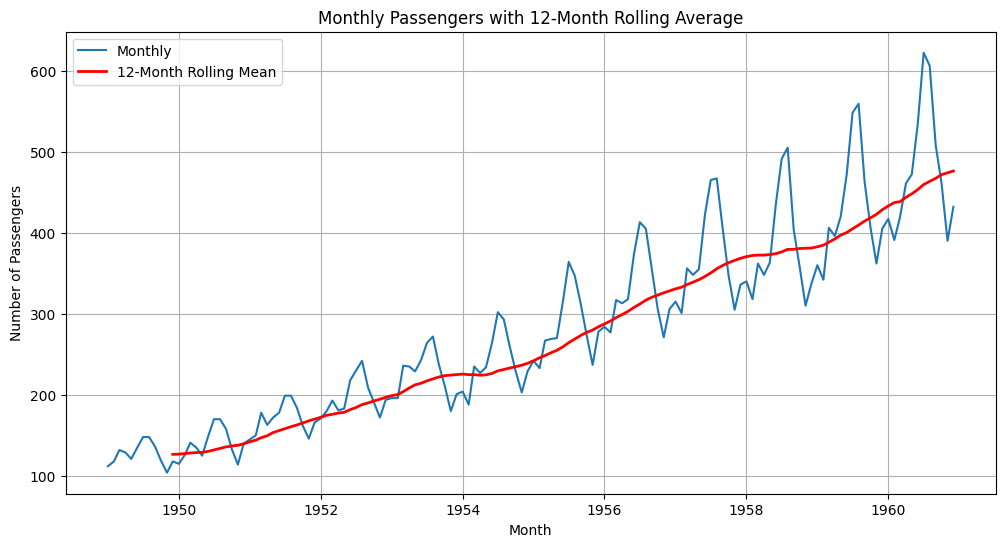

In [3]:
df['RollingMean'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(12,6))
plt.plot(df['Month'], df['Passengers'], label='Monthly')
plt.plot(df['Month'], df['RollingMean'], color='red', linewidth=2, label='12-Month Rolling Mean')
plt.title('Monthly Passengers with 12-Month Rolling Average')
plt.xlabel('Month')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

## 3. Seasonal Decomposition

**Description:**  
Decomposes the time series into trend, seasonality, and residuals using statsmodels.

**Features used:**  
- `Month` (time)
- `Passengers` (value)

**Observation:**  
- The decomposition clearly separates the upward trend and repeating seasonal pattern.

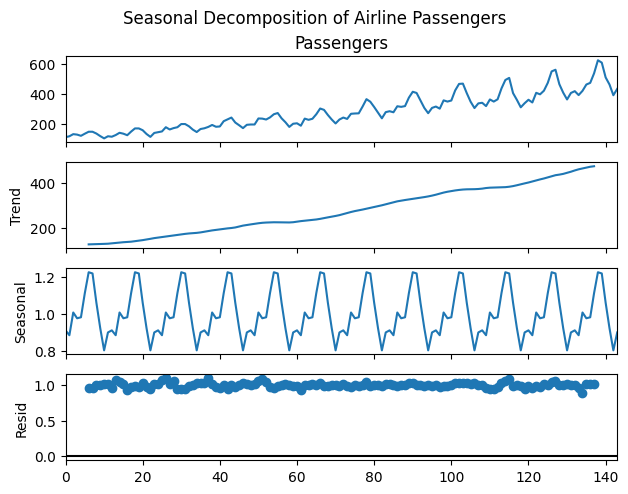

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
result.plot()
plt.suptitle('Seasonal Decomposition of Airline Passengers', y=1.02)
plt.show()

## 4. Heatmap of Monthly Patterns

**Description:**  
A heatmap showing the number of passengers for each month and year, revealing seasonal patterns.

**Features used:**  
- Year (y-axis)
- Month (x-axis)
- Passengers (color)

**Observation:**  
- The heatmap highlights peak travel months and year-over-year growth.

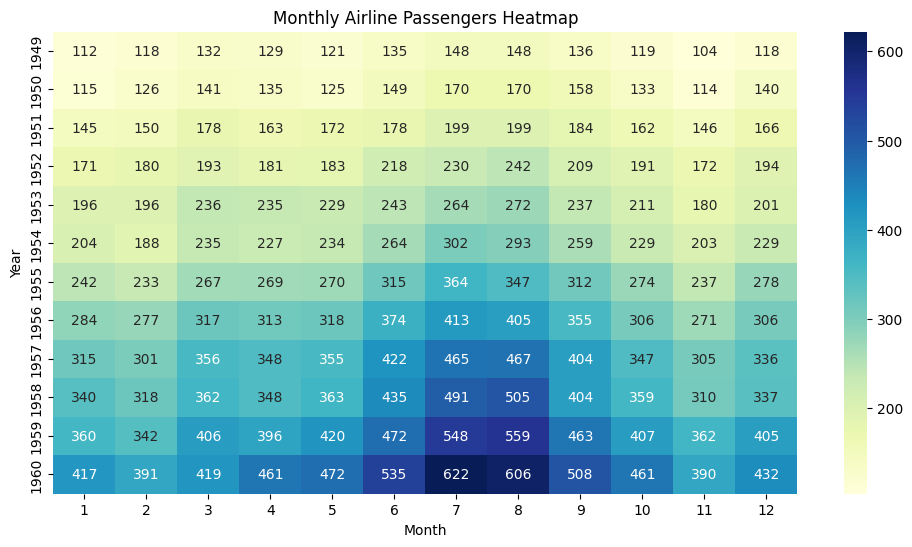

In [5]:
import seaborn as sns

df['Year'] = df['Month'].dt.year
df['MonthNum'] = df['Month'].dt.month
pivot = df.pivot(index='Year', columns='MonthNum', values='Passengers')

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Monthly Airline Passengers Heatmap')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## 5. Interactive Time Series Plot

**Description:**  
An interactive line plot for exploring the time series data.

**Features used:**  
- `Month` (x-axis)
- `Passengers` (y-axis)

**Observation:**  
- Interactive features allow zooming and hovering for precise values.

In [6]:


fig = px.line(df, x='Month', y='Passengers', title='Monthly International Airline Passengers (Interactive)')
fig.show()